In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys


from pystruct.datasets import load_letters
from pystruct.models import ChainCRF
from pystruct.learners import FrankWolfeSSVM

# path to project root
sys.path.append('c:/users/ananasy/pycharmProjects/data_analysis/')

from task_2.sub_task_1 import data_handler
from task_2.sub_task_1 import utils
from task_2.sub_task_1.peregudins_cube import struct_svm
from task_2.sub_task_1.peregudins_cube import multiclass_svm

In [4]:
def run_simple():
    dh = data_handler.DataHandler()
    X_train, y_train = dh.get_lst_train()
    X_train = np.array(X_train, dtype='int32')
    y_train = np.array(y_train, dtype='int32')
    simple_classifier = multiclass_svm.MultiClassSVM(X_train, y_train, dh.CLASS_NUM, dh.DIM)

    #################################################################
    # get optimal learning rate with k-fold cross-validation
    
    alphas = [10**(-i) for i in range(5)]
    classifier = lambda X, y: multiclass_svm.MultiClassSVM(X, y, dh.CLASS_NUM, dh.DIM)
    opt_alpha_idx = utils.k_fold_validation(X_train, y_train, alphas, 3, classifier)
    print('Optimal regularization coefficient: {0}'.format(alphas[opt_alpha_idx]))
    
    #################################################################

    simple_classifier.train(alphas[opt_alpha_idx])

    X_test, y_test = dh.get_lst_test()

    n = len(X_test)
    score = 0
    for idx, x in enumerate(X_test):
        pred = simple_classifier.get_prediction(x)
        if pred == y_test[idx]:
            score += 1

    print('Accuracy: {}'.format(score/n))
    
    return simple_classifier

### Simple svm training

In [5]:
simple_classifier = run_simple()

0.7632607481853713


0.42490228922389733


0.39791550344314164


0.3964265773310999


0.40219616601526154
Optimal regularization coefficient: 0.001


Accuracy: 0.6135921499882421


In [18]:
def run_struct():
    dh = data_handler.DataHandler()

    X, y = dh.get_train_set()
    X, y_one_hot = dh.get_train_set_one_hot()
    dim, class_num = dh.dim, dh.class_num

    #################################################################
    # get optimal learning rate with k-fold cross-validation

    alphas = [10**(-i) for i in range(1, 6)]
    classifier = lambda X, y, y_: struct_svm.StructSVM(X, y, y_, dh.CLASS_NUM, dh.DIM)
    opt_alpha_idx = utils.k_fold_validation(X, y, alphas, 3, classifier, y_one_hot, True)
    print('Optimal regularization coefficient: {0}'.format(alphas[opt_alpha_idx]))

    #################################################################

    ssvm = struct_svm.StructSVM(X, y, y_one_hot, class_num, dim)

    ssvm.train(reg_step=alphas[opt_alpha_idx])

    x_test, y_test = dh.get_test_set()

    mean_loss = 0
    for idx, sample in enumerate(x_test):
        y_pred = ssvm.get_prediction(sample)
        mean_loss += ssvm.hamming_loss_(y_test[idx], y_pred)
    
    mean_loss = mean_loss/x_test.shape[0]
    print("Mean loss: {}".format(mean_loss))

    A_matrix = ssvm.A_matrix
    plt.matshow(A_matrix)
    plt.colorbar()
    plt.title("A_matrix visualization")
    plt.xticks(np.arange(25), dh.dictionary)
    plt.yticks(np.arange(25), dh.dictionary)
    plt.show()
    
    return mean_loss, ssvm

### Structured svm training

---------- Epoch 0 ----------


Current loss: 0.8248612675740343
---------- Epoch 1 ----------


Current loss: 0.67223408388302
---------- Epoch 2 ----------


Current loss: 0.6690856129685914
---------- Epoch 3 ----------


Current loss: 0.6131397975546922
---------- Epoch 4 ----------


Current loss: 0.4733277242851717
---------- Epoch 5 ----------


Current loss: 0.343438080831698
---------- Epoch 6 ----------


Current loss: 0.3206228936548086
---------- Epoch 7 ----------


Current loss: 0.29187898980452204
---------- Epoch 8 ----------


Current loss: 0.2834945196647326
---------- Epoch 9 ----------


Current loss: 0.27521580074771573
---------- Epoch 10 ----------


Current loss: 0.26701720265550066
---------- Epoch 11 ----------


Current loss: 0.25861105797276046
---------- Epoch 12 ----------


Current loss: 0.25579267068628797
---------- Epoch 13 ----------


Current loss: 0.25562777057457925
---------- Epoch 14 ----------


Current loss: 0.25556631902376603
---------- Epoch 0 ----------


Current loss: 0.869224740980061
---------- Epoch 1 ----------


Current loss: 0.7377249936824405
---------- Epoch 2 ----------


Current loss: 0.634210718359655
---------- Epoch 3 ----------


Current loss: 0.5339436981458257
---------- Epoch 4 ----------


Current loss: 0.41605627823712954
---------- Epoch 5 ----------


Current loss: 0.3451756222500904
---------- Epoch 6 ----------


Current loss: 0.30347823571227844
---------- Epoch 7 ----------


Current loss: 0.2765919128153173
---------- Epoch 8 ----------


Current loss: 0.2628724998405851
---------- Epoch 9 ----------


Current loss: 0.2584217673579375
---------- Epoch 10 ----------


Current loss: 0.2459234205510802
---------- Epoch 11 ----------


Current loss: 0.2422899145771488
---------- Epoch 12 ----------


Current loss: 0.23989610271525166
---------- Epoch 13 ----------


Current loss: 0.23857001745299616
---------- Epoch 14 ----------


Current loss: 0.23426647229838715
---------- Epoch 0 ----------


Current loss: 0.8782656055528407
---------- Epoch 1 ----------


Current loss: 0.7335178533050861
---------- Epoch 2 ----------


Current loss: 0.600587090214749
---------- Epoch 3 ----------


Current loss: 0.5271733467478154
---------- Epoch 4 ----------


Current loss: 0.44276740989506963
---------- Epoch 5 ----------


Current loss: 0.31760777048011113
---------- Epoch 6 ----------


Current loss: 0.2969277412894435
---------- Epoch 7 ----------


Current loss: 0.270632204674758
---------- Epoch 8 ----------


Current loss: 0.2638880386752728
---------- Epoch 9 ----------


Current loss: 0.25829193855789595
---------- Epoch 10 ----------


Current loss: 0.24852544618502065
---------- Epoch 11 ----------


Current loss: 0.24589111243366576
---------- Epoch 12 ----------


Current loss: 0.2406340822298269
---------- Epoch 13 ----------


Current loss: 0.23814882517010186
---------- Epoch 14 ----------


Current loss: 0.23332620689003675
0.31266865059600113
---------- Epoch 0 ----------


Current loss: 0.8521975896443977
---------- Epoch 1 ----------


Current loss: 0.7663448312916401
---------- Epoch 2 ----------


Current loss: 0.6759955470061851
---------- Epoch 3 ----------


Current loss: 0.5705901840476302
---------- Epoch 4 ----------


Current loss: 0.41757513762832954
---------- Epoch 5 ----------


Current loss: 0.3594348323071728
---------- Epoch 6 ----------


Current loss: 0.3280063907723483
---------- Epoch 7 ----------


Current loss: 0.3012587235459576
---------- Epoch 8 ----------


Current loss: 0.2952820111330753
---------- Epoch 9 ----------


Current loss: 0.2836669654222847
---------- Epoch 10 ----------


Current loss: 0.27754668499349366
---------- Epoch 11 ----------


Current loss: 0.271233913840297
---------- Epoch 12 ----------


Current loss: 0.262303423526828
---------- Epoch 13 ----------


Current loss: 0.260412719668039
---------- Epoch 14 ----------


Current loss: 0.26044093022816456
---------- Epoch 0 ----------


Current loss: 0.8611270349036316
---------- Epoch 1 ----------


Current loss: 0.7798685239110775
---------- Epoch 2 ----------


Current loss: 0.656673905290927
---------- Epoch 3 ----------


Current loss: 0.5505069044430748
---------- Epoch 4 ----------


Current loss: 0.4163042985383412
---------- Epoch 5 ----------


Current loss: 0.34215792481749935
---------- Epoch 6 ----------


Current loss: 0.3121620282790495
---------- Epoch 7 ----------


Current loss: 0.28672536683175026
---------- Epoch 8 ----------


Current loss: 0.28228565170054565
---------- Epoch 9 ----------


Current loss: 0.2748989958032513
---------- Epoch 10 ----------


Current loss: 0.26722765414254795
---------- Epoch 11 ----------


Current loss: 0.26219167357465234
---------- Epoch 12 ----------


Current loss: 0.2585113350006967
---------- Epoch 13 ----------


Current loss: 0.25789332416992017
---------- Epoch 14 ----------


Current loss: 0.2561974196016752


---------- Epoch 0 ----------


Current loss: 0.85505776138755
---------- Epoch 1 ----------


Current loss: 0.7425746180533424
---------- Epoch 2 ----------


Current loss: 0.6244544226459111
---------- Epoch 3 ----------


Current loss: 0.5365551056508505
---------- Epoch 4 ----------


Current loss: 0.41962721675487696
---------- Epoch 5 ----------


Current loss: 0.3300027868112977
---------- Epoch 6 ----------


Current loss: 0.31019968211457627
---------- Epoch 7 ----------


Current loss: 0.29738039147613615
---------- Epoch 8 ----------


Current loss: 0.28699878726474465
---------- Epoch 9 ----------


Current loss: 0.284238497908711
---------- Epoch 10 ----------


Current loss: 0.27498375147311344
---------- Epoch 11 ----------


Current loss: 0.2676994695611717
---------- Epoch 12 ----------


Current loss: 0.2633982979195747
---------- Epoch 13 ----------


Current loss: 0.26056339051019917
---------- Epoch 14 ----------


Current loss: 0.25554159788202363


0.3086022081748579
---------- Epoch 0 ----------


Current loss: 0.8370705358471322
---------- Epoch 1 ----------


Current loss: 0.7606233128573548
---------- Epoch 2 ----------


Current loss: 0.6731062436381584
---------- Epoch 3 ----------


Current loss: 0.5307611124100485
---------- Epoch 4 ----------


Current loss: 0.3871113933347981
---------- Epoch 5 ----------


Current loss: 0.33783476570710624
---------- Epoch 6 ----------


Current loss: 0.320390289379651
---------- Epoch 7 ----------


Current loss: 0.2939143067334561
---------- Epoch 8 ----------


Current loss: 0.2805615838062649
---------- Epoch 9 ----------


Current loss: 0.27113431485771916
---------- Epoch 10 ----------


Current loss: 0.2626141647950159
---------- Epoch 11 ----------


Current loss: 0.25774917753641163
---------- Epoch 12 ----------


Current loss: 0.2542980541916714
---------- Epoch 13 ----------


Current loss: 0.2540994643654219
---------- Epoch 14 ----------


Current loss: 0.25004120583907824
---------- Epoch 0 ----------


Current loss: 0.879998754200882
---------- Epoch 1 ----------


Current loss: 0.7341287140755229
---------- Epoch 2 ----------


Current loss: 0.6244052755754882
---------- Epoch 3 ----------


Current loss: 0.5989384551618595
---------- Epoch 4 ----------


Current loss: 0.5001214388448426
---------- Epoch 5 ----------


Current loss: 0.3827719325591667
---------- Epoch 6 ----------


Current loss: 0.3315022684171621
---------- Epoch 7 ----------


Current loss: 0.31579539845497306
---------- Epoch 8 ----------


Current loss: 0.3093389766262108
---------- Epoch 9 ----------


Current loss: 0.29853426124702725
---------- Epoch 10 ----------


Current loss: 0.2933218967793436
---------- Epoch 11 ----------


Current loss: 0.28840270249844735
---------- Epoch 12 ----------


Current loss: 0.28435303467218354
---------- Epoch 13 ----------


Current loss: 0.28068149935171216
---------- Epoch 14 ----------


Current loss: 0.2771813706388176
---------- Epoch 0 ----------


Current loss: 0.8574053428840673
---------- Epoch 1 ----------


Current loss: 0.7739503581524858
---------- Epoch 2 ----------


Current loss: 0.5981078673099943
---------- Epoch 3 ----------


Current loss: 0.49164582462454876
---------- Epoch 4 ----------


Current loss: 0.36560632629781625
---------- Epoch 5 ----------


Current loss: 0.3145500834862539
---------- Epoch 6 ----------


Current loss: 0.2992194979960942
---------- Epoch 7 ----------


Current loss: 0.27296179588732816
---------- Epoch 8 ----------


Current loss: 0.27099570642123816
---------- Epoch 9 ----------


Current loss: 0.2629054515224729
---------- Epoch 10 ----------


Current loss: 0.2558167069337286
---------- Epoch 11 ----------


Current loss: 0.2504233945723309
---------- Epoch 12 ----------


Current loss: 0.24506824735548147
---------- Epoch 13 ----------


Current loss: 0.2474370428625748
---------- Epoch 14 ----------


Current loss: 0.24477248519801725
0.3237482879576898
---------- Epoch 0 ----------


Current loss: 0.8331948311735555
---------- Epoch 1 ----------


Current loss: 0.731284135486263
---------- Epoch 2 ----------


Current loss: 0.6903007394496756
---------- Epoch 3 ----------


Current loss: 0.5326699541593161
---------- Epoch 4 ----------


Current loss: 0.4171019760381464
---------- Epoch 5 ----------


Current loss: 0.3248444109082408
---------- Epoch 6 ----------


Current loss: 0.30506068399685443
---------- Epoch 7 ----------


Current loss: 0.2863663168982317
---------- Epoch 8 ----------


Current loss: 0.273292641164982
---------- Epoch 9 ----------


Current loss: 0.26825607607522506
---------- Epoch 10 ----------


Current loss: 0.2637414122520506
---------- Epoch 11 ----------


Current loss: 0.263429862100075
---------- Epoch 12 ----------


Current loss: 0.258202028467986
---------- Epoch 13 ----------


Current loss: 0.25199269406716224
---------- Epoch 14 ----------


Current loss: 0.25474767549235655
---------- Epoch 0 ----------


Current loss: 0.8545235320235317
---------- Epoch 1 ----------


Current loss: 0.7463267465395127
---------- Epoch 2 ----------


Current loss: 0.6275703906023051
---------- Epoch 3 ----------


Current loss: 0.5534931793974339
---------- Epoch 4 ----------


Current loss: 0.4125442642463923
---------- Epoch 5 ----------


Current loss: 0.3502287783138848
---------- Epoch 6 ----------


Current loss: 0.32209306650796027
---------- Epoch 7 ----------


Current loss: 0.2763867279292813
---------- Epoch 8 ----------


Current loss: 0.2651323853451517
---------- Epoch 9 ----------


Current loss: 0.261007024890004
---------- Epoch 10 ----------


Current loss: 0.259012223001585
---------- Epoch 11 ----------


Current loss: 0.25066421167485026
---------- Epoch 12 ----------


Current loss: 0.25047617866766825
---------- Epoch 13 ----------


Current loss: 0.24839043344362505
---------- Epoch 14 ----------


Current loss: 0.2461214730895585
---------- Epoch 0 ----------


Current loss: 0.8522760572760573
---------- Epoch 1 ----------


Current loss: 0.7354800164374633
---------- Epoch 2 ----------


Current loss: 0.6496083998743564
---------- Epoch 3 ----------


Current loss: 0.5644836192176617
---------- Epoch 4 ----------


Current loss: 0.39626794600198906
---------- Epoch 5 ----------


Current loss: 0.313645172794109
---------- Epoch 6 ----------


Current loss: 0.28407799056735233
---------- Epoch 7 ----------


Current loss: 0.27190810371661445
---------- Epoch 8 ----------


Current loss: 0.26046003641748344
---------- Epoch 9 ----------


Current loss: 0.26046539158241316
---------- Epoch 10 ----------


Current loss: 0.2524877191366556
---------- Epoch 11 ----------


Current loss: 0.24553388691686562
---------- Epoch 12 ----------


Current loss: 0.24560419485951407
---------- Epoch 13 ----------


Current loss: 0.2397443277762429
---------- Epoch 14 ----------


Current loss: 0.2381326947284397


0.3084493379365176
---------- Epoch 0 ----------


Current loss: 0.8616470468066206
---------- Epoch 1 ----------


Current loss: 0.7604910633102121
---------- Epoch 2 ----------


Current loss: 0.7038393226159189
---------- Epoch 3 ----------


Current loss: 0.5383483124440571
---------- Epoch 4 ----------


Current loss: 0.4190769927472061
---------- Epoch 5 ----------


Current loss: 0.3626366305089712
---------- Epoch 6 ----------


Current loss: 0.35325566868120056
---------- Epoch 7 ----------


Current loss: 0.3238210075976033
---------- Epoch 8 ----------


Current loss: 0.30156891571785216
---------- Epoch 9 ----------


Current loss: 0.3006056059779465
---------- Epoch 10 ----------


Current loss: 0.2839339620190684
---------- Epoch 11 ----------


Current loss: 0.27935191286255134
---------- Epoch 12 ----------


Current loss: 0.2783615497977203
---------- Epoch 13 ----------


Current loss: 0.2695664560026265
---------- Epoch 14 ----------


Current loss: 0.27017128261809126
---------- Epoch 0 ----------


Current loss: 0.8550960387130601
---------- Epoch 1 ----------


Current loss: 0.7540194970514122
---------- Epoch 2 ----------


Current loss: 0.6557122192228573
---------- Epoch 3 ----------


Current loss: 0.5545589457823499
---------- Epoch 4 ----------


Current loss: 0.41996803432973706
---------- Epoch 5 ----------


Current loss: 0.30559142984674936
---------- Epoch 6 ----------


Current loss: 0.2699749423153677
---------- Epoch 7 ----------


Current loss: 0.2692977884999163
---------- Epoch 8 ----------


Current loss: 0.25559830240681325
---------- Epoch 9 ----------


Current loss: 0.25177041044062365
---------- Epoch 10 ----------


Current loss: 0.24888141999844152
---------- Epoch 11 ----------


Current loss: 0.23849699945444638
---------- Epoch 12 ----------


Current loss: 0.24063238770685588
---------- Epoch 13 ----------


Current loss: 0.23823368121240474
---------- Epoch 14 ----------


Current loss: 0.23559360261487922
---------- Epoch 0 ----------


Current loss: 0.848769079620144
---------- Epoch 1 ----------


Current loss: 0.7578347007602325
---------- Epoch 2 ----------


Current loss: 0.670810460225354
---------- Epoch 3 ----------


Current loss: 0.5048027091112198
---------- Epoch 4 ----------


Current loss: 0.3563310330331607
---------- Epoch 5 ----------


Current loss: 0.3026559905815227
---------- Epoch 6 ----------


Current loss: 0.28549220873688996
---------- Epoch 7 ----------


Current loss: 0.27441026467622215
---------- Epoch 8 ----------


Current loss: 0.2630186007845584
---------- Epoch 9 ----------


Current loss: 0.2506760969526928
---------- Epoch 10 ----------


Current loss: 0.24993256152830634
---------- Epoch 11 ----------


Current loss: 0.24157623109750773
---------- Epoch 12 ----------


Current loss: 0.23502492779088544
---------- Epoch 13 ----------


Current loss: 0.23405397203269554
---------- Epoch 14 ----------


Current loss: 0.2313358922401477
0.31350377226445625
Optimal regularization coefficient: 0.0001
---------- Epoch 0 ----------


Current loss: 0.8263669608484949
---------- Epoch 1 ----------


Current loss: 0.5889283144254732
---------- Epoch 2 ----------


Current loss: 0.44885638351547413
---------- Epoch 3 ----------


Current loss: 0.4239680261342198
---------- Epoch 4 ----------


Current loss: 0.2901607980088098
---------- Epoch 5 ----------


Current loss: 0.25011556073345864
---------- Epoch 6 ----------


Current loss: 0.24210160105046533
---------- Epoch 7 ----------


Current loss: 0.22142131069687912
---------- Epoch 8 ----------


Current loss: 0.21537760298413744
---------- Epoch 9 ----------


Current loss: 0.21556817156959218
---------- Epoch 10 ----------


Current loss: 0.20853379574970513
---------- Epoch 11 ----------


Current loss: 0.2040093626386243
---------- Epoch 12 ----------


Current loss: 0.19809298971230815
---------- Epoch 13 ----------


Current loss: 0.19770932586983744
---------- Epoch 14 ----------


Current loss: 0.1942162044079659


Mean loss: 0.2548496021321233


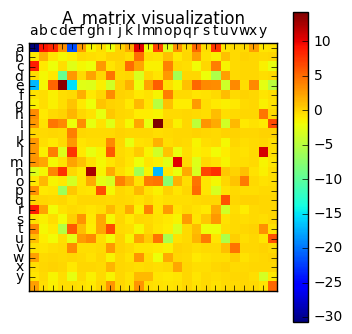

Test score with chain CRF: 0.786583
Test score with our model: 0.7451503978678766
[14 12 12  0 13 25  8 13  6]
[14  0 12  0 13  3  8 13  6]
[14 12 12  0 13  3  8 13  6]
[14 12 12  0 13  5  8 13  6]
[14 12 12  0 13 14 10 13  6]
[array([14, 12, 12,  0, 13, 25,  8, 13,  6], dtype=int64), array([14, 12, 12,  0, 13,  3,  8, 13,  6], dtype=int64), array([14, 12, 12,  0, 13,  3,  8, 13,  6], dtype=int64), array([14, 12, 12,  0, 13, 25,  8, 13,  6], dtype=int64), array([14, 20, 13,  0, 13, 20, 10, 13,  6], dtype=int64)]


In [20]:
test_loss, custom_ssvm = run_struct()

abc = "abcdefghijklmnopqrstuvwxyz"

letters = load_letters()
X, y, folds = letters['data'], letters['labels'], letters['folds']
X, y = np.array(X), np.array(y)
X_train, X_test = X[folds == 1], X[folds != 1]
y_train, y_test = y[folds == 1], y[folds != 1]

# Train linear chain CRF
model = ChainCRF()
ssvm = FrankWolfeSSVM(model=model, C=.1, max_iter=11)
ssvm.fit(X_train, y_train)

print("Test score with chain CRF: %f" % ssvm.score(X_test, y_test))
print("Test score with our model: {}".format(1 - test_loss))

for i in range(5):
    print(custom_ssvm.get_prediction(X_test[i]))
print(ssvm.predict(X_test[:5]))

In [2]:
def run_struct_without_A():
    dh = data_handler.DataHandler()

    X, y = dh.get_train_set()
    X, y_one_hot = dh.get_train_set_one_hot()
    dim, class_num = dh.dim, dh.class_num

    ssvm = struct_svm.StructSVM(X, y, y_one_hot, class_num, dim)
    ssvm.set_A_not_trainable()
    
    ssvm.train(reg_step=1e-4)

    x_test, y_test = dh.get_test_set()

    mean_loss = 0
    for idx, sample in enumerate(x_test):
        y_pred = ssvm.get_prediction(sample)
        mean_loss += ssvm.hamming_loss_(y_test[idx], y_pred)
    
    mean_loss = mean_loss/x_test.shape[0]
    print("Mean loss: {}".format(mean_loss))
    
    return mean_loss, ssvm

In [3]:
loss, struct_classifier = run_struct_without_A()

---------- Epoch 0 ----------


Current loss: 0.8241454095147279
---------- Epoch 1 ----------


Current loss: 0.6946210197630657
---------- Epoch 2 ----------


Current loss: 0.5335173349377892
---------- Epoch 3 ----------


Current loss: 0.4592950412907797
---------- Epoch 4 ----------


Current loss: 0.3697100366489575
---------- Epoch 5 ----------


Current loss: 0.3445949883449883
---------- Epoch 6 ----------


Current loss: 0.329845292806941
---------- Epoch 7 ----------


Current loss: 0.3148719060295769
---------- Epoch 8 ----------


Current loss: 0.3040722062028883
---------- Epoch 9 ----------


Current loss: 0.3013053313479456
---------- Epoch 10 ----------


Current loss: 0.2953139781619896
---------- Epoch 11 ----------


Current loss: 0.29411458964015846
---------- Epoch 12 ----------


Current loss: 0.29328190354468797
---------- Epoch 13 ----------


Current loss: 0.2899868479058824
---------- Epoch 14 ----------


Current loss: 0.2901379633623955


Mean loss: 0.3240874641854718


In [7]:
letters = load_letters()
X, y, folds = letters['data'], letters['labels'], letters['folds']
X, y = np.array(X), np.array(y)
X_train, X_test = X[folds == 1], X[folds != 1]
y_train, y_test = y[folds == 1], y[folds != 1]

for i in range(5):
    print(struct_classifier.get_prediction(X_test[i]))
    print([simple_classifier.get_prediction(X_test[i][j]) for j in range(X_test[i].shape[0])])

[14 12 12  0 13 25  8 13  6]
[14, 12, 12, 0, 13, 3, 8, 13, 6]
[14  0  0  0 13  3  8 13  1]
[14, 13, 12, 0, 13, 3, 16, 13, 24]
[14 12 12  0 13  3  8 13  6]
[14, 12, 13, 0, 13, 3, 8, 13, 6]
[14 12 12  0 13  0  8 13  6]
[14, 12, 12, 0, 13, 0, 8, 13, 6]
[14 12 12  0 13 12 10 13 24]
[14, 13, 13, 0, 13, 13, 10, 13, 6]


### Check gradient on random generated dataset

In [2]:
ssvm = struct_svm.StructSVM()
diff, n, a = ssvm.check_grad(3, 5)
print(np.c_[n, a])
print(diff)

[[ -8.08654958e-01  -8.08654858e-01]
 [ -7.66008757e-01  -7.66008726e-01]
 [  2.32357775e-01   2.32357704e-01]
 [  9.15300520e-02   9.15301471e-02]
 [ -3.86765917e-02  -3.86766645e-02]
 [ -1.72913357e-01  -1.72913420e-01]
 [  9.68654637e-01   9.68654651e-01]
 [ -2.02056034e-02  -2.02056261e-02]
 [  1.22813226e-03   1.22808307e-03]
 [  9.67134106e-02   9.67134790e-02]
 [ -1.22263741e-01  -1.22263723e-01]
 [ -2.77873156e-02  -2.77873431e-02]
 [ -3.48243522e-01  -3.48243464e-01]
 [  9.47154928e-01   9.47154766e-01]
 [ -3.28849774e-02  -3.28849934e-02]
 [  1.26000010e+00   1.40000001e+00]
 [ -1.00000009e-01  -1.00824385e-09]
 [  3.00000093e-01   1.07499102e-08]
 [ -1.20000020e-01  -2.19213930e-09]
 [ -2.20000051e-01  -5.97427748e-09]
 [ -1.40000012e-01  -1.56334496e-09]
 [ -1.20000013e-01  -8.80000001e-01]
 [ -9.99999576e-02   5.02465352e-09]
 [ -1.79999955e-01   5.29927032e-09]
 [ -1.40000130e-01  -1.53288262e-08]
 [ -2.00000860e-02  -1.01873917e-08]
 [ -7.99999755e-02   2.82239645e-09]
 